<a href="https://colab.research.google.com/github/PX2145-2025/week-7-b-ViceiroBarreiros-Siro/blob/main/random_walktemp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed

# Introduction
Random processes are very common in physics. When dealing with large numbers of molecules, such as in gases, we don’t describe the trajectory of every single particle ($10^{23}$ particles is too much to handle) but often use probabilities to determine the average behaviour. Here, we look at some illustrative examples of using random numbers in physical applications.

## Random walks
The random walk problem is a classic example which, despite its simplicity, describes very well the basic physical phenomenon of _diffusion_. Diffusion is a process where par- ticles which are initially concentrated in a region in space spread out with time. For example, a drop of ink in water will gradually spread to the whole volume of water, even if the water is perfectly still. This is because the individual molecules (both the ink and the water) (i) have random directions and speeds, which depend on the temperature, and (ii) also collide with each other. It turns out that these two ingredients can be modelled very easily.

## The method
We first look at a random walk in 1-D for a single particle. We start the particle off at the origin of the x-axis and assume that it moves unit distance in each time step (the molecular speed is thus 1 unit). At the end of each time step we set the direction to left or right with equal probability, mimicking the effect of collisions. You can easily write the python code, but for flexibility of later python coding, I show here how to define a function, called `walk(steps)`, which is passed a single number steps and returns a vector of that length, which contains all the positions of the random walk.

In [ ]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    '''
    x = np.zeros(steps, int)  # initialise the array of integers
    x[0] = 0  # start at the origin
    for i in range(1, len(x)):
        rnd = random()  # rnd selected from [0,1)
        # step left or right randomly ...
        if (rnd<0.5):
            x[i] = x[i-1] + 1  # steps right one unit
        else:
            x[i] = x[i-1] - 1 # steps left one unit
    return x

IMPORTANT: Make sure you understand how this function is used, and how it works. The rest of this worksheet is based on using it. You can also use the vectorised version below.

In [ ]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    x = np.cumsum(x) # cumulative sum
    return x

# Exercises

This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video example on 2D array slicing.

## Exercise 1
Use the above function to write code for a single random walker in 1-D.

 1. [2] Plot to the screen a random walk for 1000 steps, i.e. plot out the steps (position $x$ plotted
against step number $i$).
 2. [2] Plot out as above, but this time for 100 such walks (all displayed on the same
graph). You should do this simply by writing a loop.



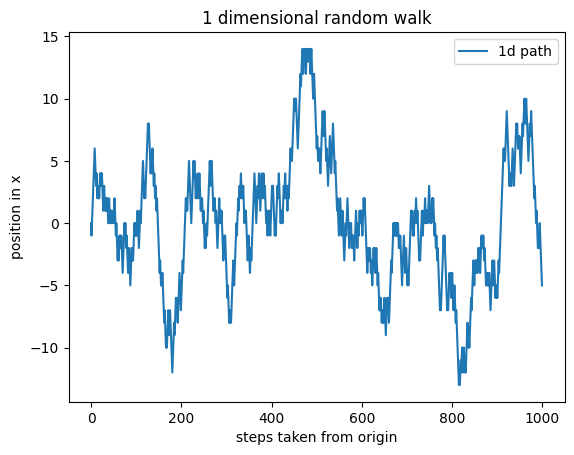

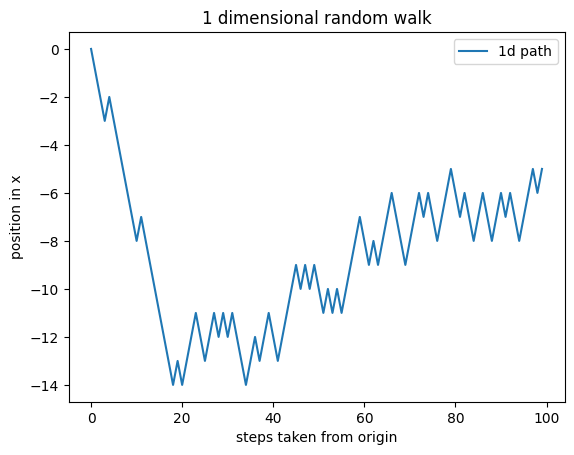

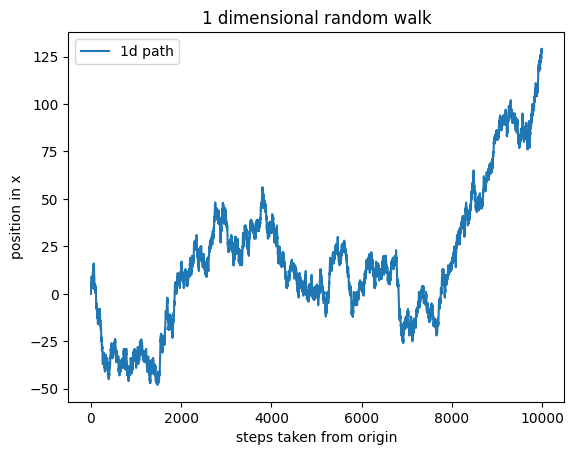

array([  0,   1,   2, ..., 127, 128, 129])

In [ ]:
# Import and variable declaration

import numpy as n
import matplotlib.pyplot as m
import random as r

# We will create a function that creates a random 1 dimensional walk with a total number of steps

def OnedWalk(steps):

    # We will define an array of steps number of elements

    x = n.zeros(steps, int)

    # We will create a for loop to create the random walk

    for i in range(1, len(x)):

        rnd = r.random()

        # This will return a random float between 0 and 1
        # if rnd is greater than 0.5 we will sum it to the previous value of the array
        # if rnd is less than 0.5 we will subtract it from the previous value of the array

        if rnd > 0.5:
            x[i] = x[i-1] + 1
        else:
            x[i] = x[i-1] - 1

    # With the array populated we can plot these values

    xvals = n.arange(0, len(x))
    m.plot(xvals, x, label  = "1d path")
    m.title("1 dimensional random walk")
    m.xlabel("steps taken from origin")
    m.ylabel("position in x")
    m.legend()
    m.show()


    return x

# Now we test with steps = 1000 and steps = 100

OnedWalk(1000)
OnedWalk(100)
OnedWalk(10000)

## Exercise 2
You will now extend your code to allow for _multiple_ walks in a more systematic way. Do this by defining a 2-D array to contain the trajectories of `N` particles, each taking a number of steps called `steps`, i.e. define an initially empty integer array like this:
```python
particles = np.zeros((steps, N), int)
```
Which you will fill with the `steps` of each `N` particles. You may find [week 6 of PX1224](https://alexandria.astro.cf.ac.uk/Joomla-python/index.php/week-6-two-dimensional-arrays) useful, in particular "2.2. Returning parts of 2-d Arrays".

 1. [2] Calculate and then plot out the steps for 10 walkers to the screen (still use 1000 steps), all on the same plot.
 2. [2] Calculate (plot if you wish) the steps for 500 walkers. We define _for each step_ a "mean position": the average of the positions of all walkers at each step. We also define _for each step_ a "mean squared position": the average of the squares of the positions of all walkers (**not** the square of the average) at each step. Those two quantities, the "mean position" and the "mean squared position" are standard quantities in random walks. Print out the "mean position" and the "mean squared position" of the 500 walkers at the _last_ step.
 3. [4] Calculate the mean position at _each_ step, and plot it.
 4. [4] Calculate the mean squared position of the 500 walkers at _each_ step, and
plot it. What do you notice?



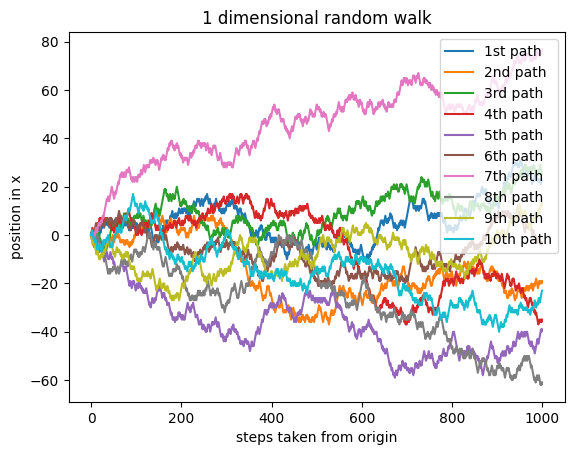

Mean position at step = 1000 for 500 walks: -2.344
Mean square position at step = 1000 for 500 walks: 983.464


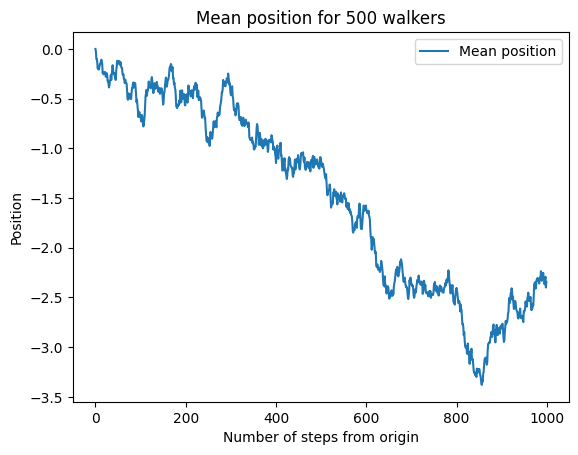

Mean position for 500 walks: -1.494432


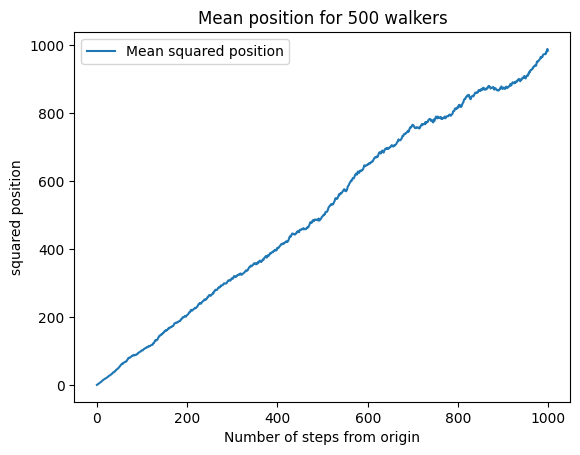

Mean Squared position for 500 walks: 510.76270400000004


In [ ]:
# We will extend the function used earlier to contain multiple particles

def OnedWalk(steps, N):

    # We will define an array of steps number of elements

    x = n.zeros((N, steps), int)

    # We will create a for loop to create the random walk

    for i in range(N):
        for j in range(1, steps): # We create another loop to fit the positions of each particle

            rnd = r.random()

            # This will return a random float between 0 and 1
            # if rnd is greater than 0.5 we will sum it to the previous value of the array
            # if rnd is less than 0.5 we will subtract it from the previous value of the array

            if rnd > 0.5:
                x[i ,j] = x[i, j-1] + 1
            else:
                x[i, j] = x[i, j-1] - 1

    # We will return the array

    return x, steps, N

x, steps, N = OnedWalk(1000,10)

# We will plot all of the particles directions

xvals = n.arange(0, steps)
m.plot(xvals, x[0], label  = "1st path")
m.plot(xvals, x[1], label  = "2nd path")
m.plot(xvals, x[2], label  = "3rd path")
m.plot(xvals, x[3], label  = "4th path")
m.plot(xvals, x[4], label  = "5th path")
m.plot(xvals, x[5], label  = "6th path")
m.plot(xvals, x[6], label  = "7th path")
m.plot(xvals, x[7], label  = "8th path")
m.plot(xvals, x[8], label  = "9th path")
m.plot(xvals, x[9], label  = "10th path")
m.title("1 dimensional random walk")
m.xlabel("steps taken from origin")
m.ylabel("position in x")
m.legend()
m.show()

# We will now use 500 particles and define the mean position and mean position squared for the last step

x, steps, N = OnedWalk(1000,500)

temp = n.zeros(N)

for i in range(N):
    temp[i] = x[i, steps - 1]

print(f"Mean position at step = 1000 for 500 walks: {n.mean(temp)}")

# We will do the exact same but for mean square position

temp = n.zeros(N)

for i in range(N):
    temp[i] = (x[i, steps - 1])**2

print(f"Mean square position at step = 1000 for 500 walks: {n.mean(temp)}")

# We will now create a function that returns an array of the mean and mean square values for each step which will then be plotted

def MeanPos(x, steps, N):

    temp = n.zeros(steps)
    temp2 = n.zeros(steps)

    for i in range(steps):

        temp[i] = n.mean(x[:, i])
        temp2[i] = n.mean(x[:, i]**2)

    Mean = n.mean(temp) # Finds the mean position for all the walks
    MeanS = n.mean(temp2) # Finds the mean squared position for all the walks

    FinalMean = temp[steps - 1] # Finds the mean position for the last step
    FinalMeanS = temp2[steps - 1] # Finds the mean squared position for the last step

    return temp, temp2, Mean, MeanS, FinalMean, FinalMeanS

# We run the function to return the mean position and mean squared position for each step for the previous 500 walkers

temp, temp2, Mean, MeanS, FinalMean, FinalMeanS = MeanPos(x, steps, N)

# We plot separately the mean position and mean squared position

m.plot(xvals, temp, label  = "Mean position")
m.title("Mean position for 500 walkers")
m.xlabel("Number of steps from origin")
m.ylabel("Position")
m.legend(loc = "best")
m.show()

# Now we print the average position over the whole walk

print(f"Mean position for 500 walks: {Mean}")

# We will do the same for the mean squared position

m.plot(xvals, temp2, label  = "Mean squared position")
m.title("Mean position for 500 walkers")
m.xlabel("Number of steps from origin")
m.ylabel("squared position")
m.legend(loc = "best")
m.show()

print(f"Mean Squared position for 500 walks: {MeanS}")

# The plot of mean squared position increases linearly as steps increases

## Exercise 3
Extend the previous exercise by plotting a histogram of particle positions. You will need to decide yourself how best to do this. You will need to use the histogram function `plt.hist`.

 1. [2] Plot a histogram at the _last_ step.
 2. [2] Plot a histogram for intermediate steps of your choice to illustrate how it changes with the number of steps. Each histogram should be saved as an image to that they can easily be viewed afterwards. (If you feel ambitious, you could make an animation, see the solution to the optional question of week 3 for an example how).


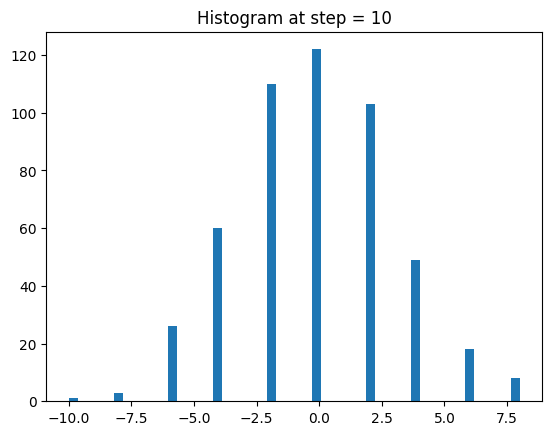

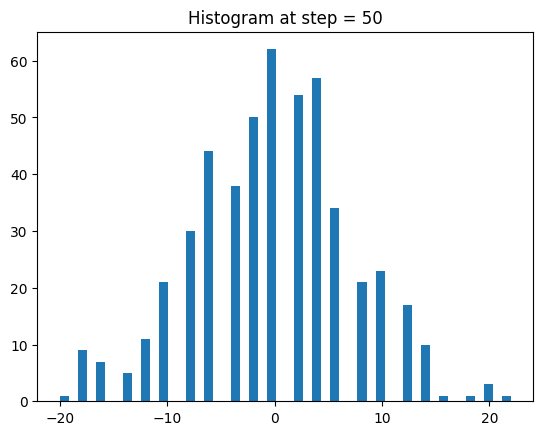

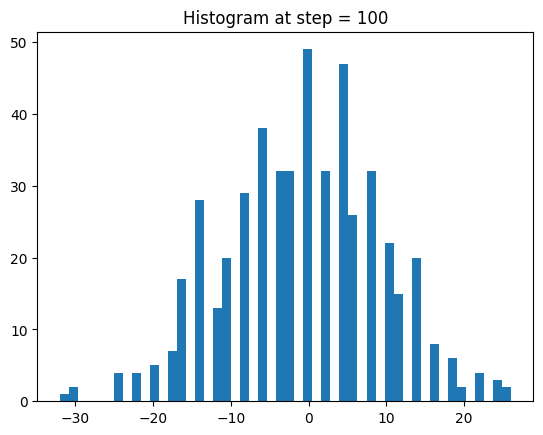

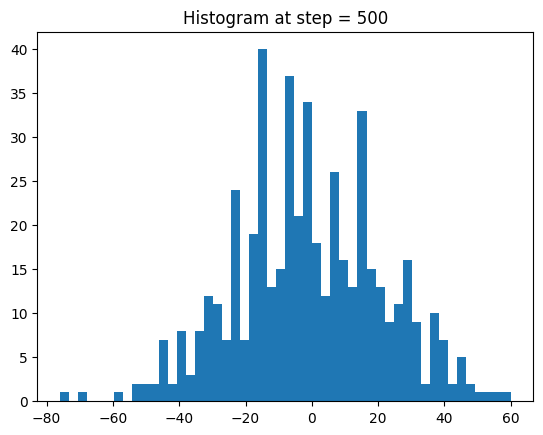

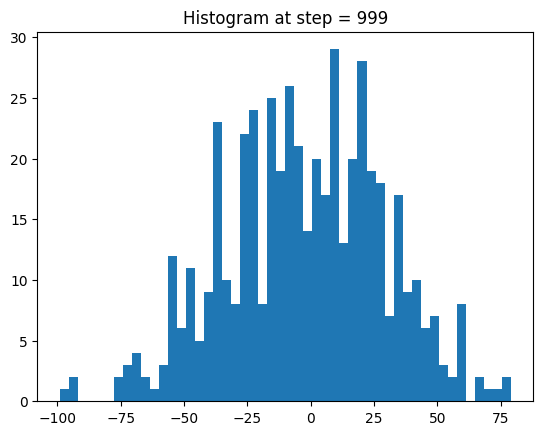

In [ ]:
# We will create an array of what steps to choose for each histogram

ReadPos = [10, 50, 100, 500, 999] # To make histograms at those number of steps

for i in ReadPos:

    Positions = x[:, i]

    m.hist(Positions, bins = 50)
    m.title(f"Histogram at step = {i}")
    m.savefig(f"Histogram at step = {i}.png")
    m.xlabel("number of particles")
    m.show()
    m.close() # so we can view the images on the files separately